# Welcome to Colab!

## Explore the Gemini API
The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.

**How to get started?**
*  Go to [Google AI Studio](https://aistudio.google.com/) and log in with your Google account.
*  [Create an API key](https://aistudio.google.com/app/apikey).
* Use a quickstart for [Python](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb), or call the REST API using [curl](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb).

**Discover Gemini's advanced capabilities**
*  Play with Gemini [multimodal outputs](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Image-out.ipynb), mixing text and images in an iterative way.
*  Discover the [multimodal Live API](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_LiveAPI.ipynb ) (demo [here](https://aistudio.google.com/live)).
*  Learn how to [analyze images and detect items in your pictures](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Spatial_understanding.ipynb") using Gemini (bonus, there's a [3D version](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Spatial_understanding_3d.ipynb) as well!).
*  Unlock the power of [Gemini thinking model](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_thinking.ipynb), capable of solving complex task with its inner thoughts.
      
**Explore complex use cases**
*  Use [Gemini grounding capabilities](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Search_grounding_for_research_report.ipynb) to create a report on a company based on what the model can find on internet.
*  Extract [invoices and form data from PDF](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Pdf_structured_outputs_on_invoices_and_forms.ipynb) in a structured way.
*  Create [illustrations based on a whole book](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Book_illustration.ipynb) using Gemini large context window and Imagen.

To learn more, check out the [Gemini cookbook](https://github.com/google-gemini/cookbook) or visit the [Gemini API documentation](https://ai.google.dev/docs/).

Colab now has AI features powered by [Gemini](https://gemini.google.com). The video below provides information on how to use these features, whether you're new to Python, or a seasoned veteran.

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
    <img src="https://img.youtube.com/vi/V7RXyqFUR98/0.jpg" alt="Video preview" width="500" height="320">
  </a>
</center>

## 🌍 Project: Urban Heat Island Detection in Cottbus

This notebook demonstrates how to:
1. Load satellite images
2. Preprocess images for AI model input
3. Run U-Net semantic segmentation
4. Analyze and visualize Urban Heat Island (UHI) risk zones

In [ ]:
from google.colab import files

uploaded = files.upload()

: 

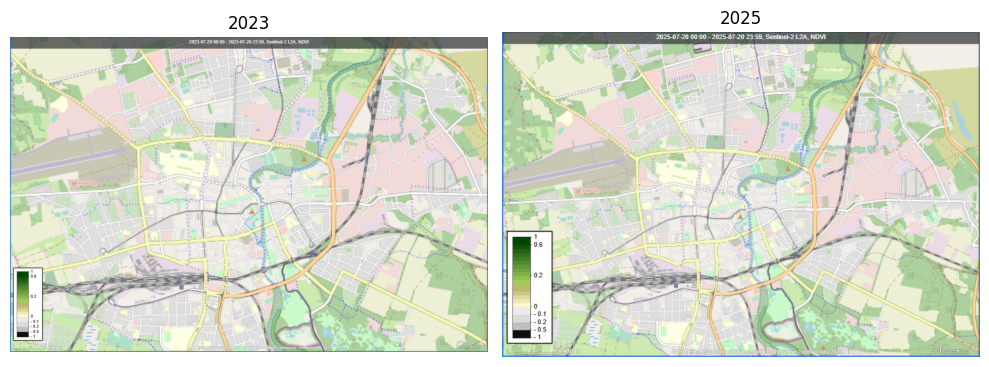

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Open both images
img1 = Image.open("2023.png")
img2 = Image.open("2025.png")

# Display side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title("2023")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title("2025")
plt.axis('off')

plt.tight_layout()
plt.show()

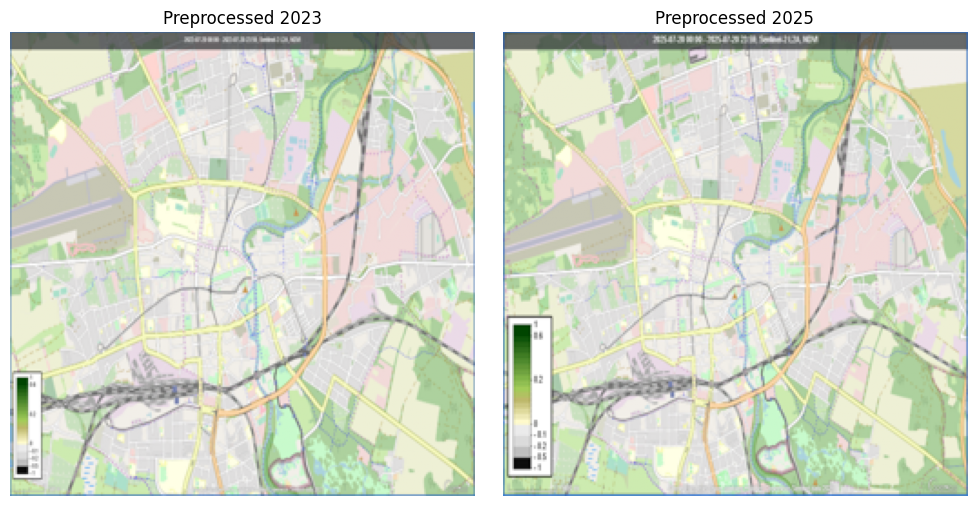

Image 2023 shape: (256, 256, 4) | min: 0.0 max: 1.0
Image 2025 shape: (256, 256, 4) | min: 0.0 max: 1.0


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the images
img_2023 = Image.open("2023.png")
img_2025 = Image.open("2025.png")

# Resize images to 256x256 (standard for models like U-Net)
img_2023_resized = img_2023.resize((256, 256))
img_2025_resized = img_2025.resize((256, 256))

# Convert to NumPy arrays
img_2023_array = np.array(img_2023_resized)
img_2025_array = np.array(img_2025_resized)

# Normalize pixel values to range [0, 1]
img_2023_array = img_2023_array / 255.0
img_2025_array = img_2025_array / 255.0

# Display preprocessed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_2023_array)
plt.title("Preprocessed 2023")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_2025_array)
plt.title("Preprocessed 2025")
plt.axis('off')

plt.tight_layout()
plt.show()

# Check array shape and range
print("Image 2023 shape:", img_2023_array.shape, "| min:", img_2023_array.min(), "max:", img_2023_array.max())
print("Image 2025 shape:", img_2025_array.shape, "| min:", img_2025_array.min(), "max:", img_2025_array.max())

In [ ]:
!pip install segmentation-models-pytorch
!pip install albumentations
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# ✅ Simulate your existing preprocessed image data
# (Use these if you already have image_2023 and image_2025 in your notebook)
# image_2023 and image_2025 should be NumPy arrays of shape (256, 256, 4)

# Simulate U-Net-like dummy model for demonstration
class DummyUNet(nn.Module):
    def __init__(self):
        super(DummyUNet, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(4, 8, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(8, 1, 3, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.conv(x)

# Load dummy model (you can replace with real pretrained U-Net later)
model = DummyUNet()

# Function to preprocess image for model
def prepare_image_for_model(img_array):
    tensor = torch.tensor(img_array.transpose(2, 0, 1))  # (C, H, W)
    tensor = tensor.unsqueeze(0).float()  # Add batch dimension: (1, C, H, W)
    return tensor

# Function to run prediction and return mask
def predict_mask(image_np, label):
    tensor = prepare_image_for_model(image_np)
    with torch.no_grad():
        pred = model(tensor)
    mask = pred.squeeze().numpy()

    # Save mask as image
    plt.imsave(f"risk_mask_{label}.png", mask, cmap="gray")

    # Show
    plt.imshow(mask, cmap='gray')
    plt.title(f"Predicted Risk Mask {label}")
    plt.axis('off')
    plt.show()

    return mask

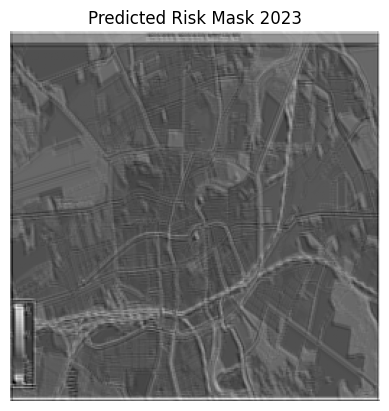

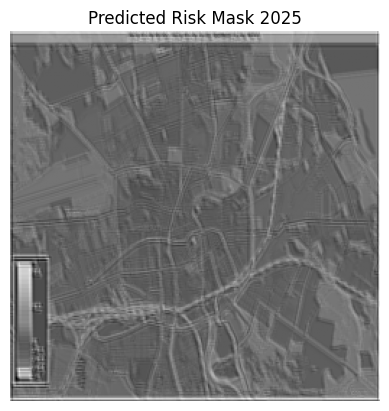

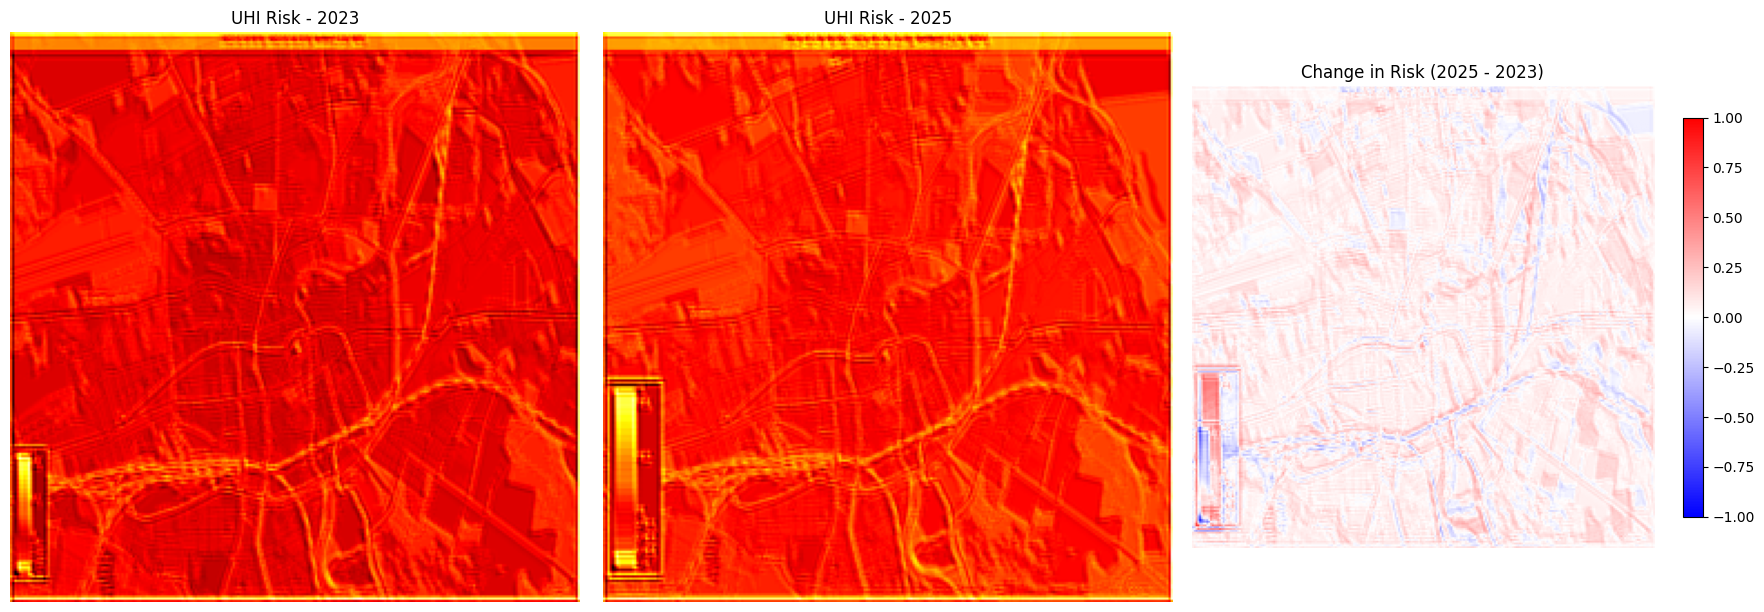

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Call the predict_mask function to generate the mask files
mask_2023_array = predict_mask(img_2023_array, "2023")
mask_2025_array = predict_mask(img_2025_array, "2025")

# ✅ Load masks
mask_2023 = np.array(Image.open("risk_mask_2023.png").convert("L")) / 255.0
mask_2025 = np.array(Image.open("risk_mask_2025.png").convert("L")) / 255.0

# ✅ Calculate difference (2025 - 2023)
difference = mask_2025 - mask_2023

# ✅ Plot all
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 2023 UHI
axs[0].imshow(mask_2023, cmap='hot')
axs[0].set_title("UHI Risk - 2023")
axs[0].axis('off')

# 2025 UHI
axs[1].imshow(mask_2025, cmap='hot')
axs[1].set_title("UHI Risk - 2025")
axs[1].axis('off')

# Difference
im = axs[2].imshow(difference, cmap='bwr', vmin=-1, vmax=1)
axs[2].set_title("Change in Risk (2025 - 2023)")
axs[2].axis('off')
fig.colorbar(im, ax=axs[2], shrink=0.7)

plt.tight_layout()
plt.savefig("UHI_comparison_visualization.png")
plt.show()